
# SAR Application: Landslide
### I. How to create SAR quicklook images of landslides? 

* Useful Products: Coherence
* Useful Wavelengths: L
* Instructions to View: InSAR decorrelation
* Qualitative Browse Products: How does the user know there is something in the image related to landslides before they develop/implement any algorithms? 

### II. How to interpret SAR images of landslides?
The radar's signal has an amplitude and phase. Amplitude is the strength of the reflected signal, determined by interactions with the ground surface, and *phase* is the specific point on the wavelength cycle, determined by the distance from the sensor to the ground. 

In InSAR, differences radar phase are measured between data collections. Radar phase is measurement of distance between radar antenna and the ground. Radar coherence or decorrelation measures how well the phase signal is preserved between data  acquisitions. Disturbed areas become decorrelated and have lower coherence values.

Decorrelation can be caused by a number of factors, including volumetric, geometric, temporal (gradual) and sudden changes. For example, if there is a sudden change with a landslide that disrups the surface, which would cause low correlation and random phase. 

L-Band provides a more stable wavelength measurement for landslides in vegetated areas, since it penetrates past smaller leaves and vegetation and will have less decorrelation than smaller wavelengths. 

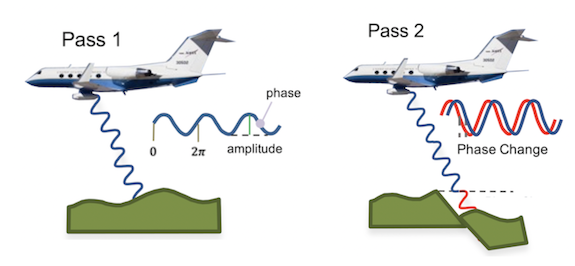

## SAR Example: Thomas Fire Montecito Debris Flows

SanAnd_26530 (2 November 2017 and 5 February 2018). "We use the 2017 Thomas fire and ensuing Montecito debris flow as a case study to demonstrate how application of various interferometric synthetic aperture radar postprocessing techniques can be used to highlight the fire scar and major damage areas from the debris flows" (Donnellan et. al, 2018).

The content of this notebook is as follows:

1. [Running the Notebook](#s1)
2. [UAVSAR PolSAR, Coherence, and Interferogram Images](#s2)
3. [Plotting Coherence](#s3)

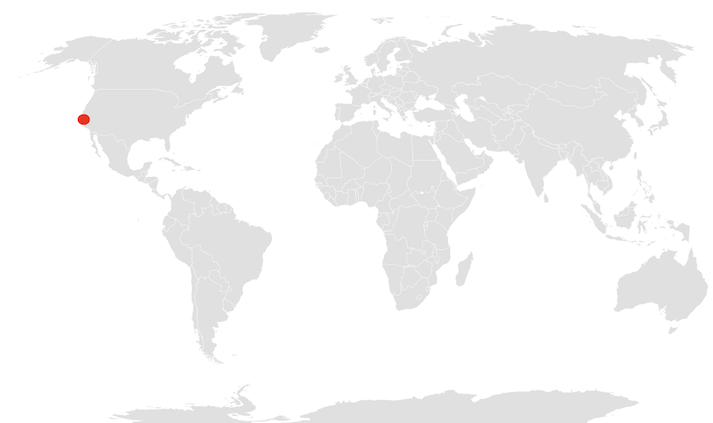

<a name="s1"></a>
## 1. Running the Notebook
- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**. 
- Code cells that are required for the notebook to run without errors are marked numerically with <font color='red'> Run cell below </font> 

### Python Packages:
This routine using the following python libaries. Some are already included in the Google Colab environment and others are installed in the cell below before imported. Downloading new python packages to this environment may take a few minutes to complete.

<font color='red'> 1. Run cell below </font> 

In [ ]:
!pip install rasterio --quiet

import numpy as np
import rasterio as rio
import pandas as pd
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
from rasterio.plot import show
from pathlib import Path

<a name="s2"></a>
## 2. UAVSAR PolSAR, Coherence, and Interferogram Images

UAVSAR Data Product Page: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_26530_17122-002_18001-007_0095d_s01_L090_02#data

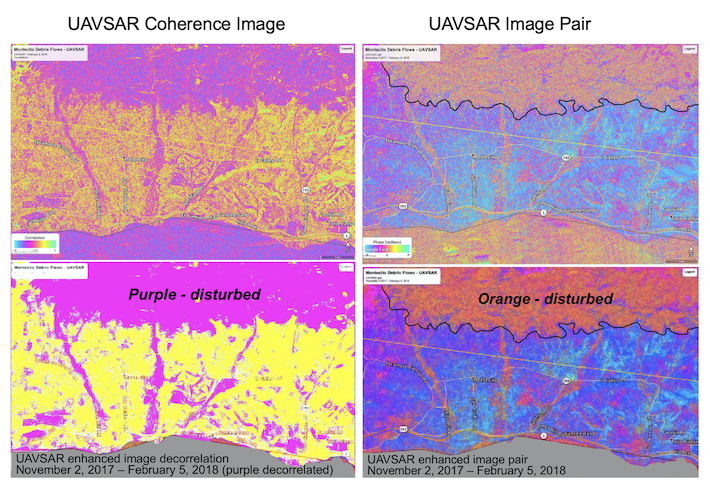

<a name="s3"></a>
## 3. Plotting Coherence

This map compares UAVSAR images from before and after the Thomas Fire in Santa Barbara County. Darker areas have low coherence, suggesting change in the surface between acquisitions from November to February. This shows the fire’s burn perimeter and resulting debris flows following heavy rain in January. A coherence map can be used for immediate response after a fire to highlight areas of most severe damage.

Read in UAVSAR geotiff with wget. Geotiff renamed from original UAVSAR product to include datatake id, first acquisition date, second acquisition date, and polarization information. 

<font color='red'> 2. Run cell below </font> 

In [ ]:
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Landslide/SanAnd_26530_171102_180205_L090HH_02_cropped.cor.grd.tif --quiet

Read in UAVSAR geotiff.

<font color='red'> 3. Run cell below </font> 

In [ ]:
with rio.open("SanAnd_26530_171102_180205_L090HH_02_cropped.cor.grd.tif") as ds:
  coherence = ds.read(1)
#Set no data
coherence[coherence== 0] = np.nan

Apply Lee Speckle Filter from Stack Overflow: https://stackoverflow.com/questions/39785970/speckle-lee-filter-in-python 

<font color='red'> 4. Run cell below </font> 

In [ ]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

coherence_lee = lee_filter(coherence, 5)


Plot Coherence Image (could add either fire perimeter or landslide risk data). Comparison of coherence images with speckle filtered applied vs. no speckle filter.

<font color='red'> 5. Run cell below </font> 

Text(0.5, 1.0, 'Lee Speckle Coherence November 2, 2017 and February 5, 2018')

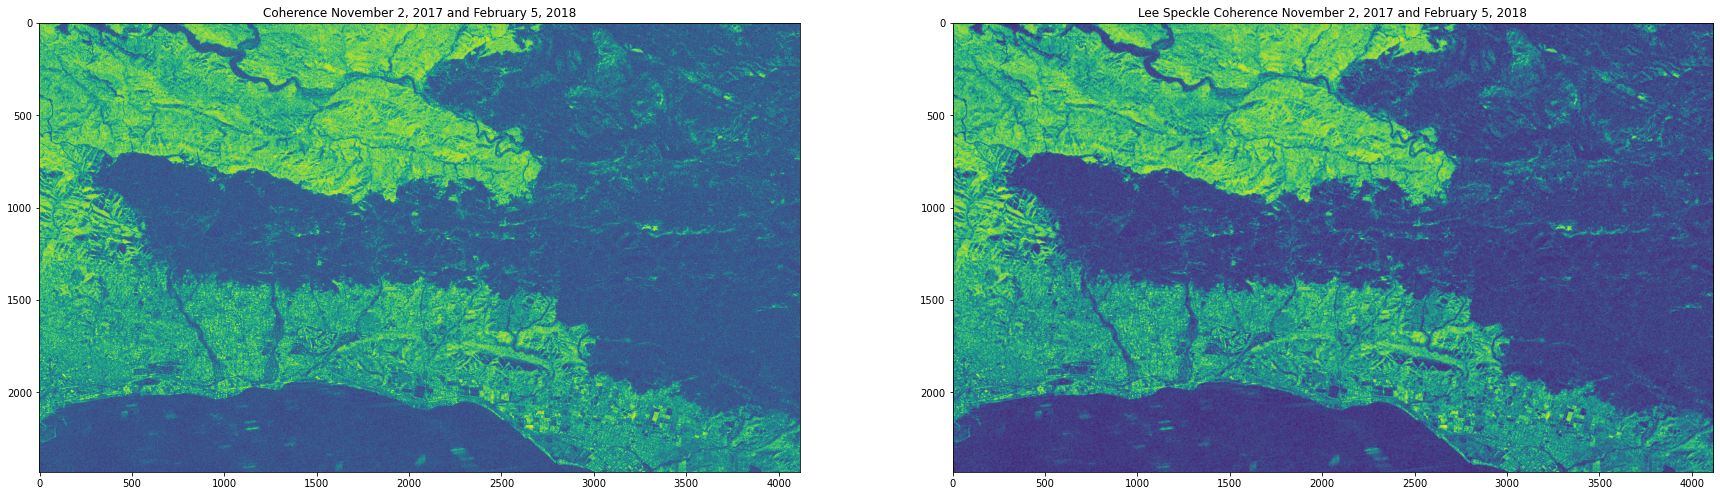

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30,15))

color = ['viridis']
ax[0].imshow(coherence)
ax[0].set_title('Coherence November 2, 2017 and February 5, 2018')

ax[1].imshow(coherence_lee)
ax[1].set_title('Lee Speckle Coherence November 2, 2017 and February 5, 2018')
# fig.colorbar(color, ax=ax[0])

### Coherence Histogram

<font color='red'> 6. Run cell below </font> 

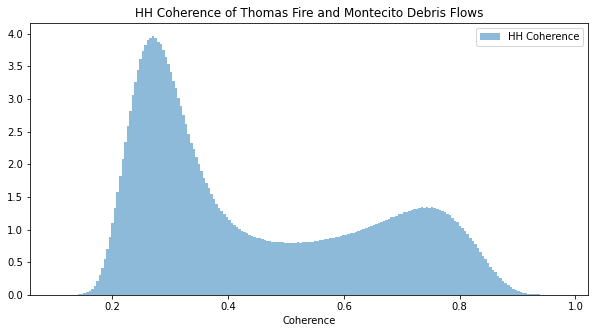

In [ ]:
## Histogram
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(coherence_lee.ravel(), density=True, bins=200, alpha=0.5, label='HH Coherence')
ax.set_title('HH Coherence of Thomas Fire and Montecito Debris Flows')
ax.legend(prop={'size': 10})
ax.set_xlabel('Coherence')

plt.show()

Trying to apply different threshold values to the coherence image.

<font color='red'> 7. Run cell below </font> 

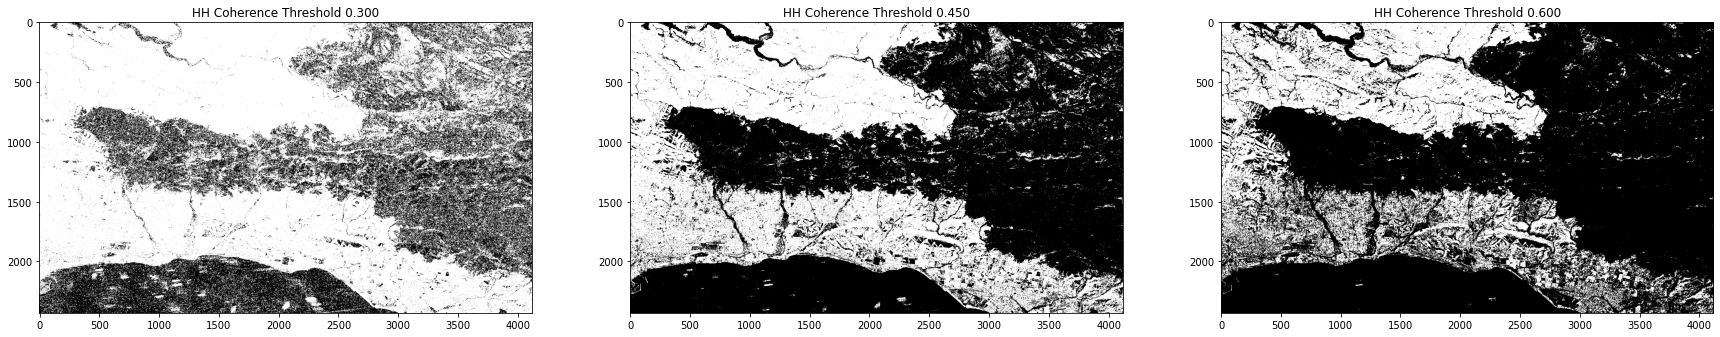

In [ ]:
## Thresholding
N=3
thresh_arr = np.linspace(0.3, 0.6, N)
fig, ax = plt.subplots(1, N, figsize=(30, 15))
for ax, thresh in zip(ax.ravel(), thresh_arr):
    ax.imshow(coherence_lee < thresh, cmap="Greys")
    ax.set_title(f'HH Coherence Threshold {thresh:0.3f}')

## Other Resources



## References

Donnellan, A., Parker, J., Milliner, C., Farr, T.G., Glasscoe, M., Lou, Y., Zheng, Y. Hawkins, B. (2018). UAVSAR and Optical Analysis of the Thomas Fire Scar and Montecito Debris Flows: Case Study of Methods for Disaster Response Using Remote Sensing Products. Earth and Space Science 5, 339-347. DOI: 10.1029/2018EA000398. Link:https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018EA000398.

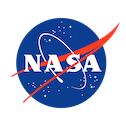

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2021. California Institute of Technology. Government sponsorship acknowledged. 